In [1]:
# IMPORTS
import numpy as np
import pandas as pd

# Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


## 1] Which year had the highest number of additions?

Using the list of S&P 500 companies from Wikipedia's S&P 500 companies page, download the data including the year each company was added to the index.

In [3]:
# URL of the Wikipedia page for S&P 500 companies
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read all tables from the page
tables = pd.read_html(url)

# The first table on the page contains the S&P 500 companies
sp500_table = tables[0]

# Display the first few rows
sp500_table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
sp500_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
 8   Year Added             503 non-null    int32 
dtypes: int32(1), int64(1), object(7)
memory usage: 33.5+ KB


In [4]:
sp500_table['Year Added'] = pd.to_datetime(sp500_table['Date added'], errors='coerce').dt.year

# View companies and the year they were added
sp500_table[['Symbol', 'Security', 'Year Added']].head()

,Symbol,Security,Year Added
0,MMM,3M,1957
1,AOS,A. O. Smith,2017
2,ABT,Abbott Laboratories,1957
3,ABBV,AbbVie,2012
4,ACN,Accenture,2011


**Question:** Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

In [8]:
sp500_table['Year Added'].value_counts()[:5]

Year Added
1957    53
2017    23
2016    23
2019    22
2008    17
Name: count, dtype: int64

**Answer:** 2017

**Additional Question:** How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [14]:
sp500_table['company_age'] = date.today().year - sp500_table['Year Added'] 

sp500_table_20_years = sp500_table[sp500_table['company_age'] > 20]
sp500_table_20_years.shape[0]

219

**Answer:** 219

## 2] How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:

* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

Context: Global Valuations: **[Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update)** article suggests "Other regions may be growing faster than the US and you need to diversify."

In [27]:
tickers = {
    "^GSPC": "United States - S&P 500",
    "000001.SS": "China - Shanghai Composite",
    "^HSI": "Hong Kong - Hang Seng",
    "^AXJO": "Australia - ASX 200",
    "^NSEI": "India - Nifty 50",
    "^GSPTSE": "Canada - TSX Composite",
    "^GDAXI": "Germany - DAX",
    "^FTSE": "UK - FTSE 100",
    "^N225": "Japan - Nikkei 225",
    "^MXX": "Mexico - IPC",
    "^BVSP": "Brazil - Ibovespa"
}

# time period
start_date = "2025-01-01"
end_date = "2025-05-01"

In [24]:
# Download and calculate YTD performance: percentage change
ytd_returns = {}

for ticker, name in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    
    if not data.empty:
        start_price = data['Adj Close'].iloc[0] # price on "2025-01-01"
        end_price = data['Adj Close'].iloc[-1]  # price on "2025-05-01"
        ytd_return = ((end_price - start_price) / start_price) * 100
        ytd_return = float(ytd_return)
        ytd_returns[name] = round(ytd_return, 2)

[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\1657115137.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ytd_return = float(ytd_return)
[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\1657115137.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ytd_return = float(ytd_return)
[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\1657115137.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ytd_return = float(ytd_return)
[*********************100%***********************]  1 of 1 compl

In [73]:
# Create DataFrame and sort by performance
returns_df = pd.DataFrame(list(ytd_returns.items()), columns=["Index", "YTD Return (%)"])
returns_df = returns_df.sort_values(by="YTD Return (%)", ascending=False).reset_index(drop=True)

returns_df

,Index,YTD Return (%)
0,Mexico - IPC,13.05
1,Hong Kong - Hang Seng,12.72
2,Brazil - Ibovespa,12.44
3,Germany - DAX,12.35
4,UK - FTSE 100,2.84
5,India - Nifty 50,2.49
6,China - Shanghai Composite,0.50
7,Canada - TSX Composite,-0.23
8,Australia - ASX 200,-0.91
9,United States - S&P 500,-5.10


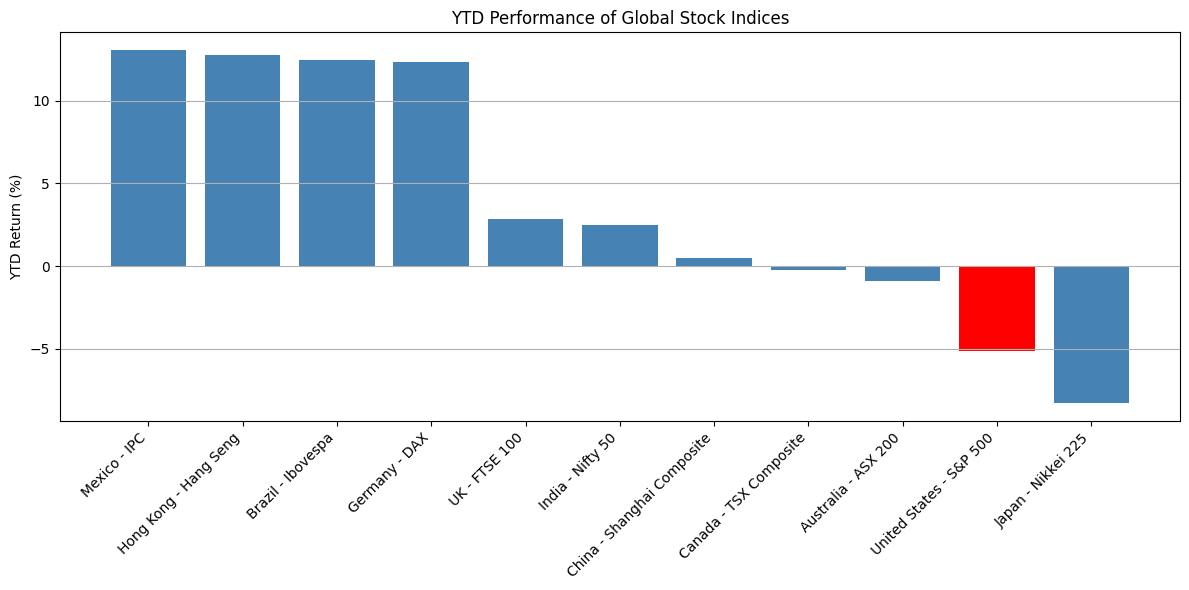

In [50]:
benchmark = "United States - S&P 500"
colors = ['red' if idx == benchmark else 'steelblue' for idx in returns_df['Index']]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(returns_df['Index'], returns_df['YTD Return (%)'], color=colors)

plt.ylabel("YTD Return (%)")
plt.title("YTD Performance of Global Stock Indices")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Additional:** How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend? Note: For simplicity, ignore currency conversion effects.)

In [81]:
periods = {
    "3Y": "2022-05-01",
    "5Y": "2020-05-01",
    "10Y": "2015-05-01"
}

end_date = "2025-05-01"
returns = {period: {} for period in periods}

for period, start_date in periods.items():
    for ticker, name in tickers.items():
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
        if not data.empty:
            start_price = data['Adj Close'].iloc[0]
            end_price = data['Adj Close'].iloc[-1]
            return_pct = float(((end_price - start_price) / start_price) * 100)
            returns[period][name] = round(return_pct, 2)

[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\4177309790.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return_pct = float(((end_price - start_price) / start_price) * 100)
[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\4177309790.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return_pct = float(((end_price - start_price) / start_price) * 100)
[*********************100%***********************]  1 of 1 completed
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\4177309790.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return_pct = float(((

In [83]:
for k in returns:
    print(f"<<<<<<<<<<<<<<<<< For a period of {k} >>>>>>>>>>>>>>>>>>>>>>>")
    
    returns_df = pd.DataFrame(list(returns[k].items()), columns=["Index", "YTD Return (%)"])
    
    # Extract S&P 500 return as scalar
    SP500_returns = float(returns_df[returns_df["Index"] == 'United States - S&P 500']["YTD Return (%)"].values[0])
    print(f"United States - S&P 500 returns is: {SP500_returns}")
    outperformers = returns_df[returns_df['YTD Return (%)'] > SP500_returns]
    print(outperformers)
    print("\n\n")

<<<<<<<<<<<<<<<<< For a period of 3Y >>>>>>>>>>>>>>>>>>>>>>>
United States - S&P 500 returns is: 34.02
                Index  YTD Return (%)
4    India - Nifty 50           42.56
6       Germany - DAX           61.40
8  Japan - Nikkei 225           34.40



<<<<<<<<<<<<<<<<< For a period of 5Y >>>>>>>>>>>>>>>>>>>>>>>
United States - S&P 500 returns is: 96.74
              Index  YTD Return (%)
4  India - Nifty 50          161.84
6     Germany - DAX          114.94



<<<<<<<<<<<<<<<<< For a period of 10Y >>>>>>>>>>>>>>>>>>>>>>>
United States - S&P 500 returns is: 164.15
              Index  YTD Return (%)
4  India - Nifty 50          192.06





## 3] Market Corrections Analysis
Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

Correction is defined as an event when a stock index goes down by more than 5% from the closest all-time high maximum.

Context: 
* Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" **[Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)**.
* **[A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)**

In [93]:
sp500 = yf.download("^GSPC", start="1950-01-01", interval="1d", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [96]:
sp500 = sp500[~sp500.index.duplicated()]
sp500.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [210]:
price = sp500[['Close']]
price.columns = ['Close']

In [211]:
# Identify all-time highs (ath)
ath_list = []
current_ath = -np.inf

for date, close in price.iterrows():
    close_price = close.values[0]
    if close_price > current_ath:
        current_ath = close_price
        ath_list.append((date, current_ath))

current_ath

np.float64(6144.14990234375)

<Axes: xlabel='Date'>

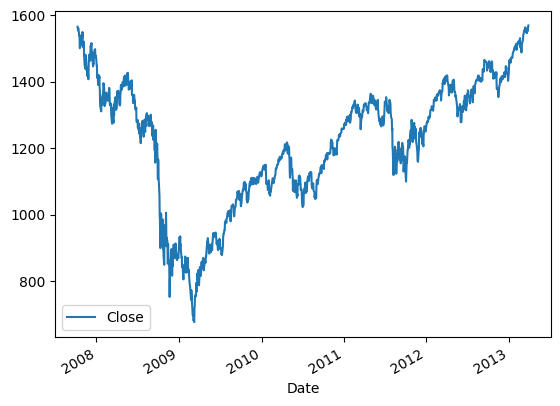

In [209]:
price['2007-10-09':'2013-03-28'].plot()

In [172]:
ath_df = pd.DataFrame(ath_list, columns=['Date', 'ATH'])

# Calculate drawdowns between ATHs
corrections = []
for i in range(len(ath_df) - 1):
    start_date = ath_df.loc[i, 'Date']
    end_date = ath_df.loc[i + 1, 'Date']
    high = ath_df.loc[i, 'ATH']
    
    # Prices between ATHs
    intermediate = sp500[start_date:end_date]
    if len(intermediate) == 0:
        continue

    low = intermediate.min().values[0] 
    drawdown_pct = (high - low) / high * 100
    duration = (end_date - start_date).days

    if drawdown_pct >= 5:
        corrections.append({
            'Start': start_date,
            'End': end_date,
            'Drawdown (%)': round(drawdown_pct, 2),
            'Duration (days)': duration
        })

In [212]:
corrections_df = pd.DataFrame(corrections)

# top 10 largest correction by drop down
corrections_df.sort_values(by='Drawdown (%)', ascending=False)[:10]

,Start,End,Drawdown (%),Duration (days)
56,2007-10-09,2013-03-28,56.78,1997
54,2000-03-24,2007-05-30,49.15,2623
24,1973-01-11,1980-07-17,48.20,2744
22,1968-11-29,1972-03-06,36.06,1193
65,2020-02-19,2020-08-18,33.92,181
35,1987-08-25,1989-07-26,33.51,701
15,1961-12-12,1963-09-03,27.97,630
27,1980-11-28,1982-11-03,27.11,705
68,2022-01-03,2024-01-19,25.43,746
18,1966-02-09,1967-05-04,22.18,449


In [213]:
percentiles = corrections_df[['Duration (days)']].describe().T

print("Market Corrections (Drop ≥ 5%) between All Time High")
percentiles[['25%', '50%', '75%']]

Market Corrections (Drop ≥ 5%) between All Time High


,25%,50%,75%
Duration (days),56.0,94.0,213.5


## 4] [Stocks] Earnings Surprise Analysis for Amazon (AMZN)
Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

Context: 
* Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.
* Reference: [Yahoo Finance earnings calendar](https://finance.yahoo.com/calendar/earnings?symbol=AMZN)**

In [294]:
amzn = yf.download("AMZN", start="1997-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [295]:
amzn['2Day_Return'] = amzn['Close'] / amzn['Close'].shift(2) - 1

In [307]:
amzn.columns = [c[0] for c in amzn.columns]

In [346]:
# Download AMZN earnings data
# earnings = yf.Ticker("AMZN").earnings_dates

# load the provided earnings data
earnings = pd.read_csv('Data/ha1_Amazon.csv', delimiter=';')
earnings.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74


In [347]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Symbol         116 non-null    object
 1   Company        116 non-null    object
 2   Earnings Date  116 non-null    object
 3   EPS Estimate   116 non-null    object
 4   Reported EPS   116 non-null    object
 5   Surprise (%)   116 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [348]:
earnings[:20]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74
5,AMZN,"Amazon.com, Inc.","February 6, 2025 at 4 PM EST",???.49,???.86,+24.47
6,AMZN,"Amazon.com, Inc.","October 31, 2024 at 4 PM EDT",???.14,???.43,+25.17
7,AMZN,"Amazon.com, Inc.","August 1, 2024 at 4 PM EDT",01.???,???.26,+22.58
8,AMZN,"Amazon.com, Inc.","April 30, 2024 at 4 PM EDT",0.83,0.98,+17.91
9,AMZN,"Amazon.com, Inc.","February 1, 2024 at 4 PM EST",0.8,1,+24.55


In [349]:
# earnings.dtypes
def change_to_str(c):
    return earnings[c].astype(str)


def change_to_float(c):
    return earnings[c].astype(float)


def clean_cols(x):
    if x == '-':
        return np.nan
    elif '?' in x:
        x_split = x.split('.')
        if '?' in x_split[0]:
            x_split[0] = '0'
        else: x_split[1] = '0'
        x_join = '.'.join(x_split)
        return x_join
    else: return x     

# amzn.head()

In [350]:
for c in earnings.columns[-3:]:
    earnings[c] = change_to_str(c)
    earnings[c] = earnings[c].apply(clean_cols)
    earnings[c] = change_to_float(c)

earnings.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",NaN,NaN,NaN
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",NaN,NaN,NaN
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",NaN,NaN,NaN
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",NaN,NaN,NaN
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",0.36,0.59,16.74


In [354]:
# conver datetime
earnings['Earnings Date'] = pd.to_datetime(earnings['Earnings Date'], format='mixed').dt.strftime('%Y-%m-%d')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\637025437.py:2: FutureWarning: Parsed string "April 29, 2026 at 6 AM EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings['Earnings Date'] = pd.to_datetime(earnings['Earnings Date'], format='mixed').dt.strftime('%Y-%m-%d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\637025437.py:2: FutureWarning: Parsed string "February 4, 2026 at 4 PM EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings['Earnings Date'] = pd.to_datetime(earnings['Earnings Date'], format='mixed').dt.strftime('%Y-%m-%d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15324\637025437.py:2: F

In [356]:
earnings.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,2026-04-29,NaN,NaN,NaN
1,AMZN,Amazon.com Inc,2026-02-04,NaN,NaN,NaN
2,AMZN,Amazon.com Inc,2025-10-29,NaN,NaN,NaN
3,AMZN,Amazon.com Inc,2025-07-30,NaN,NaN,NaN
4,AMZN,"Amazon.com, Inc.",2025-05-01,0.36,0.59,16.74


In [364]:
# Filter for positive surprises
positive_surprises = earnings[ (earnings['Surprise (%)'] > 0) | (earnings['Reported EPS'] > earnings['EPS Estimate']) ]
positive_surprises.reset_index(inplace=True)
positive_surprises = positive_surprises.sort_values('Earnings Date')
positive_surprises['Earnings Date'] = pd.to_datetime(positive_surprises['Earnings Date'])
positive_surprises

,index,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
85,115,AMZN,"Amazon.com, Inc.",1997-07-10,NaN,NaN,13.33
84,114,AMZN,"Amazon.com, Inc.",1997-10-27,NaN,NaN,13.29
83,113,AMZN,"Amazon.com, Inc.",1998-01-22,NaN,NaN,11.41
82,112,AMZN,"Amazon.com, Inc.",1998-04-27,NaN,NaN,13.92
81,111,AMZN,"Amazon.com, Inc.",1998-07-22,NaN,NaN,1.34
...,...,...,...,...,...,...,...
4,8,AMZN,"Amazon.com, Inc.",2024-04-30,0.83,0.98,17.91
3,7,AMZN,"Amazon.com, Inc.",2024-08-01,1.00,0.26,22.58
2,6,AMZN,"Amazon.com, Inc.",2024-10-31,0.14,0.43,25.17
1,5,AMZN,"Amazon.com, Inc.",2025-02-06,0.49,0.86,24.47


In [365]:
# Match earnings date to AMZN close prices
amzn_reset = amzn.reset_index()

merged_amzn_positive_earnings = pd.merge_asof(
    positive_surprises,
    amzn_reset[['Date', 'Close']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

In [366]:
merged_amzn_positive_earnings 

,index,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),Date,Close
0,115,AMZN,"Amazon.com, Inc.",1997-07-10,NaN,NaN,13.33,1997-07-10,0.128125
1,114,AMZN,"Amazon.com, Inc.",1997-10-27,NaN,NaN,13.29,1997-10-27,0.213542
2,113,AMZN,"Amazon.com, Inc.",1998-01-22,NaN,NaN,11.41,1998-01-22,0.256771
3,112,AMZN,"Amazon.com, Inc.",1998-04-27,NaN,NaN,13.92,1998-04-27,0.344792
4,111,AMZN,"Amazon.com, Inc.",1998-07-22,NaN,NaN,1.34,1998-07-22,1.116667
...,...,...,...,...,...,...,...,...,...
81,8,AMZN,"Amazon.com, Inc.",2024-04-30,0.83,0.98,17.91,2024-04-30,175.000000
82,7,AMZN,"Amazon.com, Inc.",2024-08-01,1.00,0.26,22.58,2024-08-01,184.070007
83,6,AMZN,"Amazon.com, Inc.",2024-10-31,0.14,0.43,25.17,2024-10-31,186.399994
84,5,AMZN,"Amazon.com, Inc.",2025-02-06,0.49,0.86,24.47,2025-02-06,238.830002


In [372]:
merged_amzn_positive_earnings['Return_2d'] = ( merged_amzn_positive_earnings['Close'] / merged_amzn_positive_earnings['Close'].shift(2) ) - 1

# Compare medians
print(f"Median 2-day return after positive surprises: {round(merged_amzn_positive_earnings['Return_2d'].median()*100, 2)}%")

Median 2-day return after positive surprises: 15.72%
